In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# To plot pretty figures:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


Bad key "text.kerning_factor" on line 4 in
C:\Users\samsi\Anaconda3\envs\hello-tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Build a full regression neural network that predicts Boston Housing Prices

Here are some things you should do:
- look at the data using pandas, pyplot, seaborn etc and get some basic information. Make sure you understand what each of the features are both in terms of their numerical values and their meaning. Make some observations here.
- decide which features you are going to use and whether or not you are going to do feature scaling or split the data into test/valid/train sets. Be careful since you only have a small number of data points!
- build a regression neural network to predic house prices - your first try should not be so great, start simple and just see what you get. 
- do some hyperparameter tuning to try to improve your loss on the testing data.
- using your best parameters, train the model as long as you need to to get "good" testing loss, and plot the training curves, talk about how well your best model did.

All along you should be explaing what you are doing. For each chunk of code talk about what it does and why you want it to do that.


- input feature data (x) is stored in: boston.data
- the feature names are stored in: boston.feature_names
- output data (y) "PRICE" is stored in:  boston.target

to learn more about the data use: boston.DESCR

Initially I tried using the `.describe()` function on the data only to find out that the data is not in a dataframe.  I used the `boston.DESCR` command to look at the data to find out the data is made up as a dictionary.  Since the data is stored as a dictionary I can look at the keys.

In [2]:
print(boston.DESCR)
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

Using pandas, I can turn the data into a dataframe.

This is unnecessary but it does allow me to use `.describe()` and other descriptive stats easier rather than dealing with the dictionary.  For the nueral network later on, I use the boston data similar to how the example notebook uses the housing data.

In [18]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
print(df.head())

df['PRICE'] = boston.target
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.

Since I turned the data into a dataframe, it lets me use the seaborn package to see relationships and correlations between the variables.

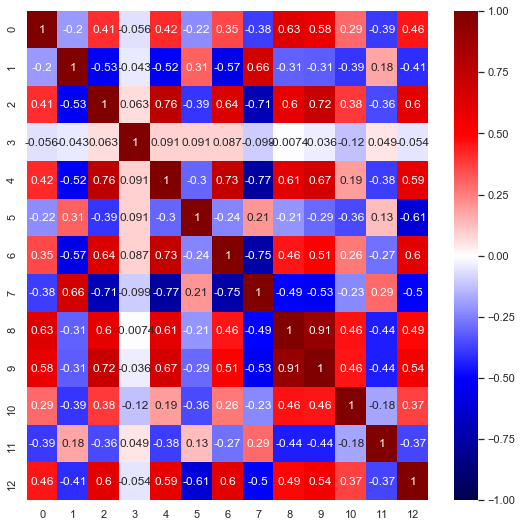

In [5]:
import seaborn as sns
# Documentation: https://seaborn.pydata.org/

# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

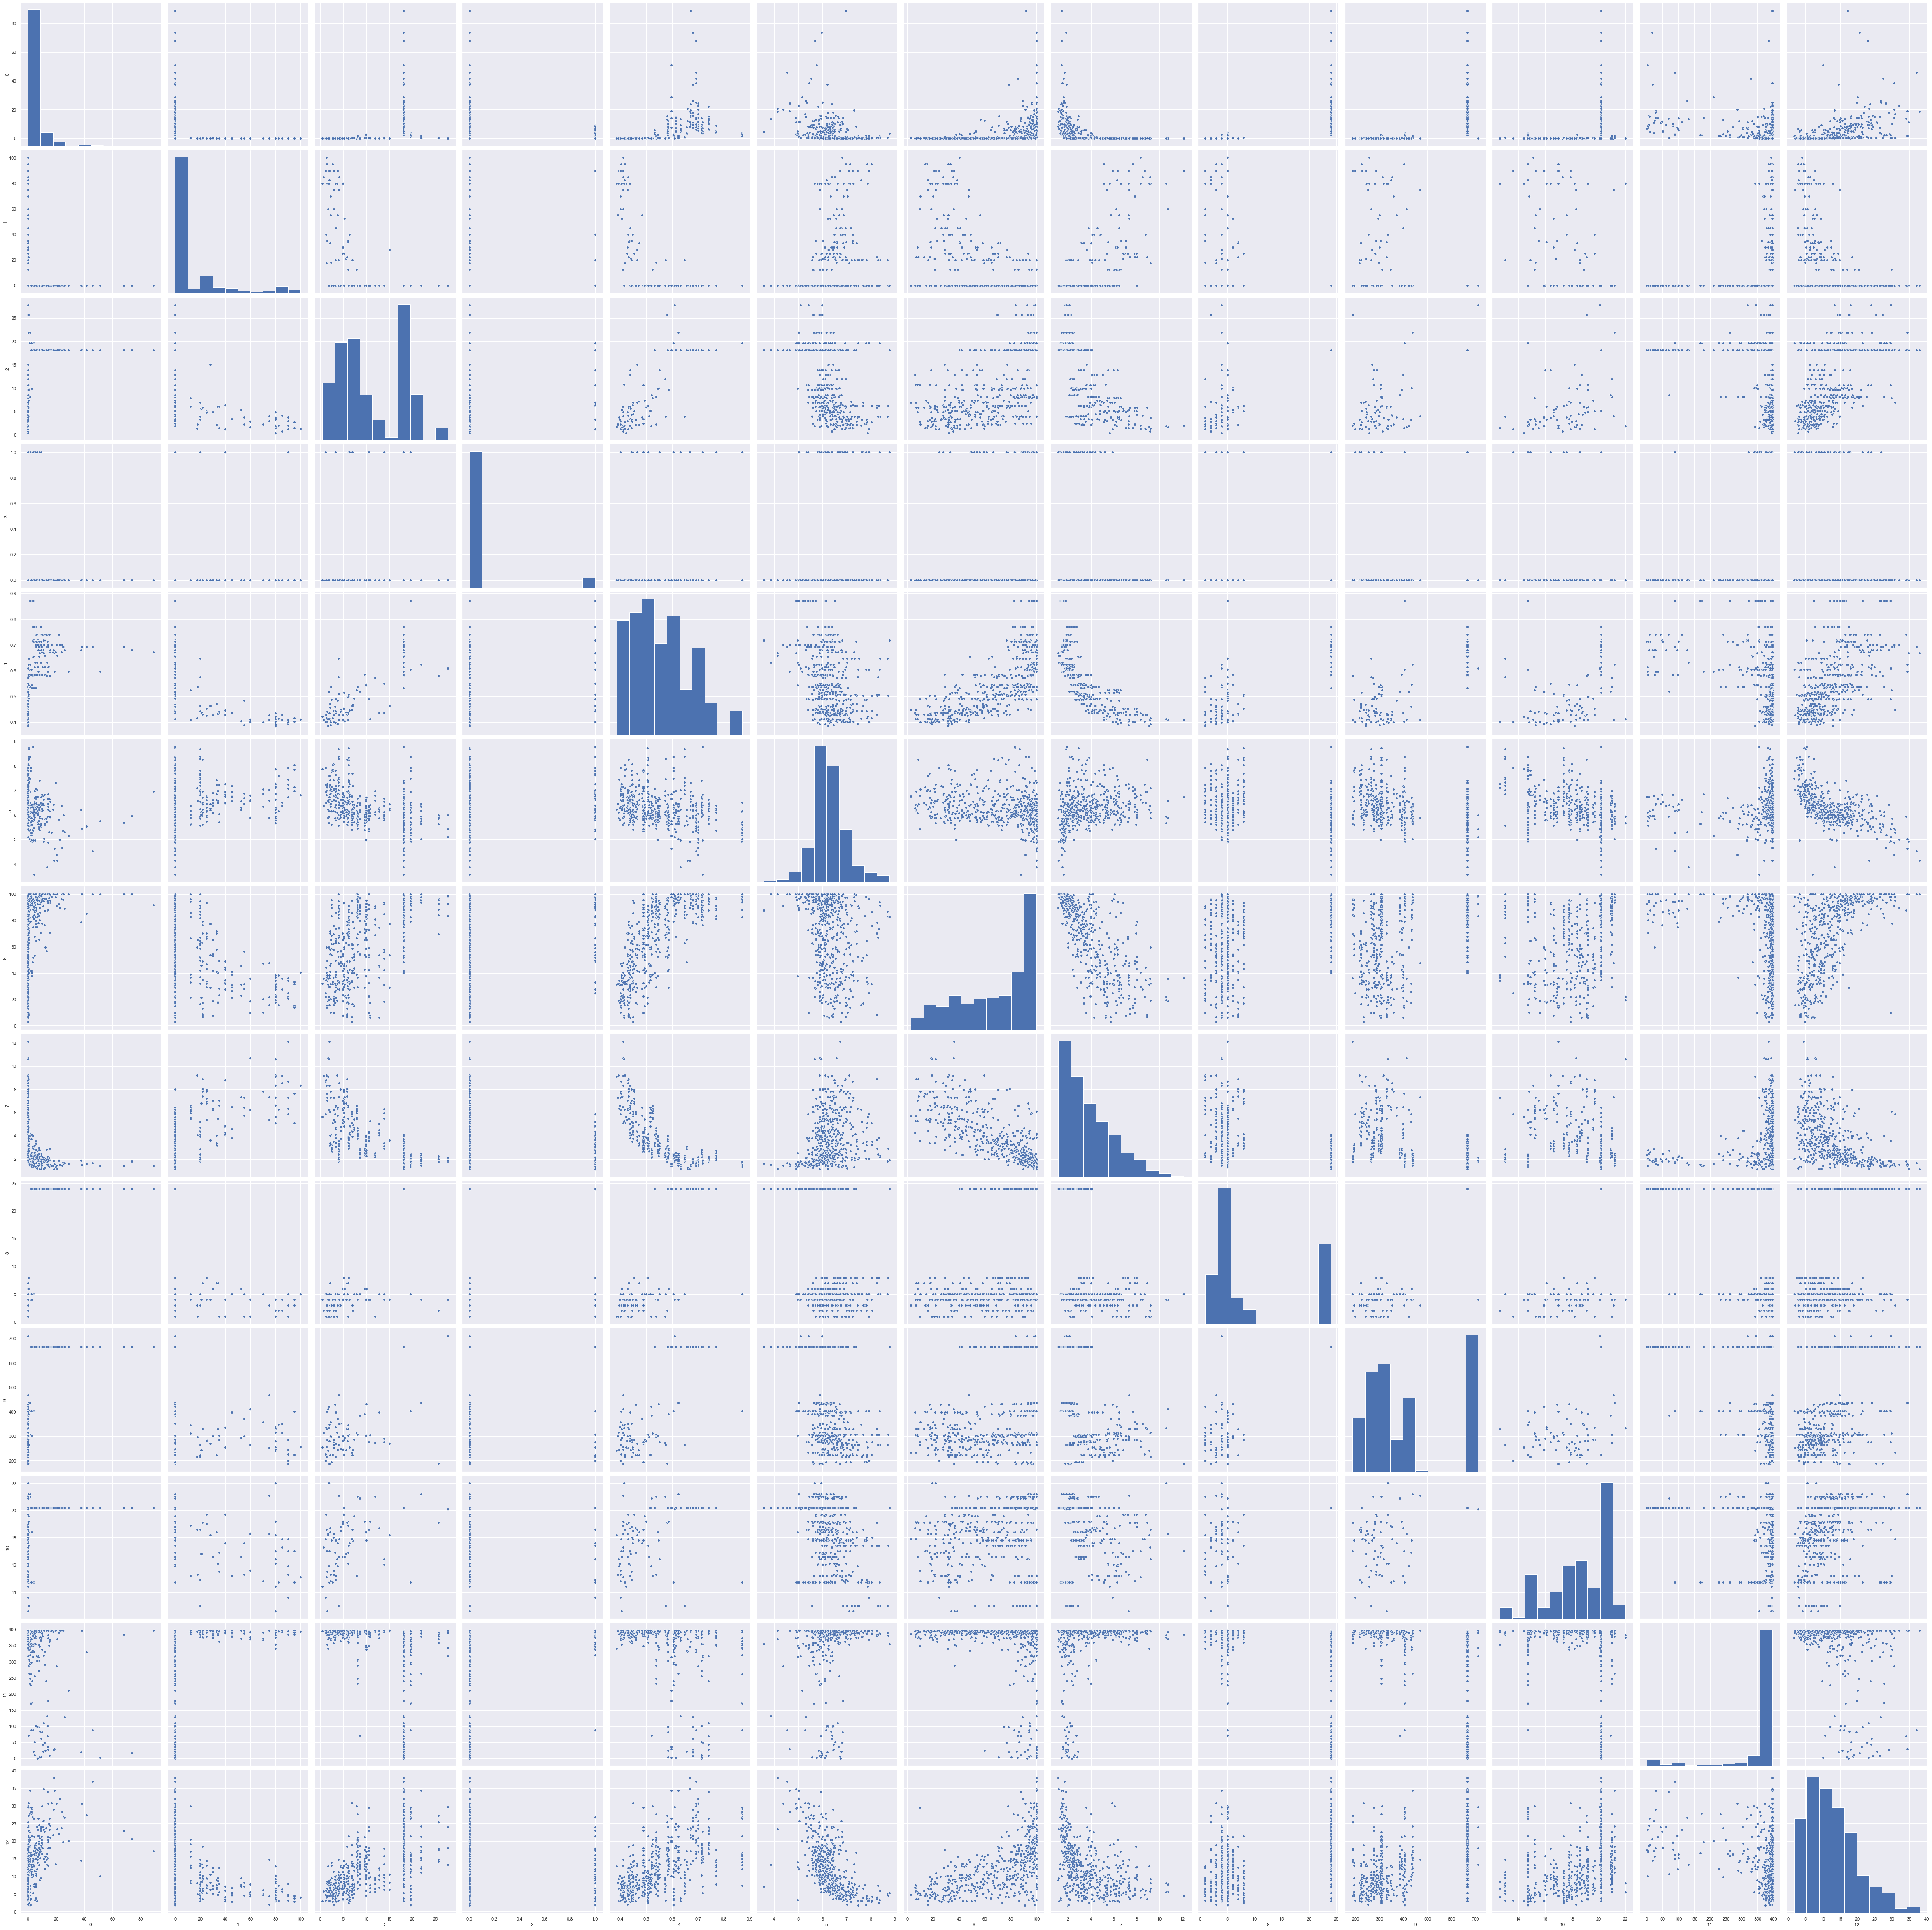

In [6]:
# Delete all rows that contain NaN or not numbers
df.dropna(inplace=True)

# Plot all of the variable-to-variable relations as scatterplots - this should just run
sns.pairplot(df,height=5)

In [19]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Instead of using the `.data` and `.target` that's built into the data set (similar to the notes), I could drop PRICE and serpate X and y into the features I want to use and the predicted.

In [20]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

However, I am going to follow along with the notes so Im going to use the `.data` and `.target`.

In [21]:
## Seperate into training and testing and validation
X_train_full, X_test, y_train_full, y_test = train_test_split(boston.data, boston.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

## scale the data but not the y
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

## check shapes
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(284, 13)
(127, 13)
(95, 13)
(284,)
(127,)
(95,)


### Simple Model

Before any parameter tuning, I want to create a few basic models to find one that gives reasonable accuracy before tuning it.

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

Train on 284 samples, validate on 95 samples
Epoch 1/40
284/284 [==============================] - 0s 738us/sample - loss: 490.1765 - val_loss: 505.8003
Epoch 2/40
284/284 [==============================] - 0s 63us/sample - loss: 349.4712 - val_loss: 338.0888
Epoch 3/40
284/284 [==============================] - 0s 58us/sample - loss: 211.1127 - val_loss: 198.2504
Epoch 4/40
284/284 [==============================] - 0s 65us/sample - loss: 128.0113 - val_loss: 121.6333
Epoch 5/40
284/284 [==============================] - 0s 63us/sample - loss: 85.2560 - val_loss: 83.6854
Epoch 6/40
284/284 [==============================] - 0s 65us/sample - loss: 60.2812 - val_loss: 63.0151
Epoch 7/40
284/284 [==============================] - 0s 56us/sample - loss: 44.9821 - val_loss: 51.5149
Epoch 8/40
284/284 [==============================] - 0s 53us/sample - loss: 35.9167 - val_loss: 45.4808
Epoch 9/40
284/284 [==============================] - 0s 55us/sample - loss: 30.6546 - val_loss: 41.6703
E

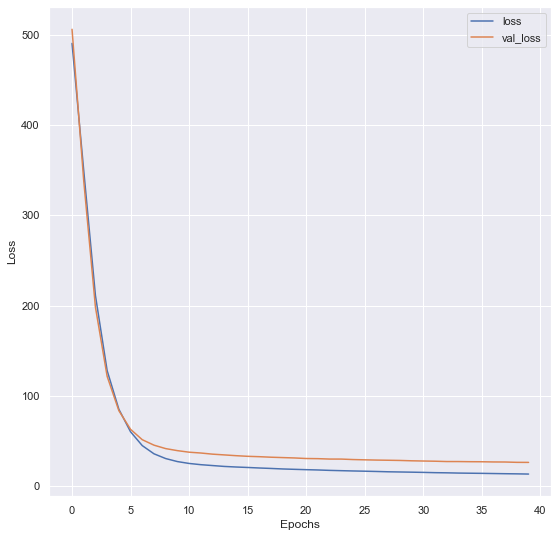

In [25]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(history.history.keys())
plt.show()

This model has a loss of 27.8 which a little high, the loss curves are close together but the are both fairly high.

## Better Model

Train on 284 samples, validate on 95 samples
Epoch 1/40
284/284 [==============================] - 0s 909us/sample - loss: 538.9011 - val_loss: 490.4031
Epoch 2/40
284/284 [==============================] - 0s 62us/sample - loss: 179.1149 - val_loss: 46.5751
Epoch 3/40
284/284 [==============================] - 0s 63us/sample - loss: 31.6051 - val_loss: 28.8849
Epoch 4/40
284/284 [==============================] - 0s 67us/sample - loss: 21.5842 - val_loss: 26.5464
Epoch 5/40
284/284 [==============================] - 0s 62us/sample - loss: 17.7645 - val_loss: 28.2674
Epoch 6/40
284/284 [==============================] - 0s 63us/sample - loss: 16.0185 - val_loss: 27.1952
Epoch 7/40
284/284 [==============================] - 0s 65us/sample - loss: 14.5241 - val_loss: 25.2709
Epoch 8/40
284/284 [==============================] - 0s 62us/sample - loss: 14.0494 - val_loss: 25.0046
Epoch 9/40
284/284 [==============================] - 0s 63us/sample - loss: 13.5388 - val_loss: 24.7681
Epoch 

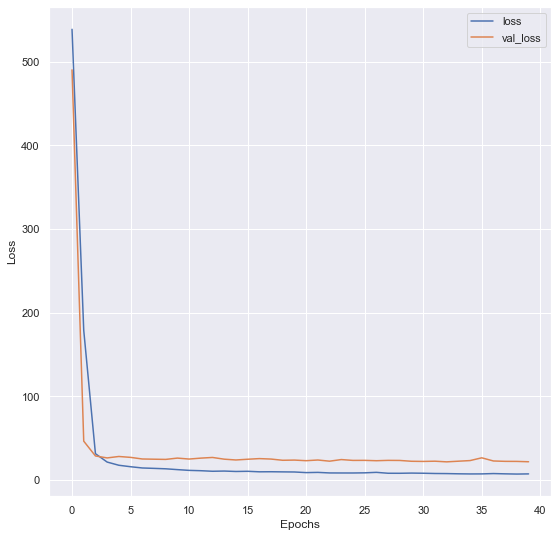

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(history.history.keys())
plt.show()


The model performed better than the previous one but based on the loss curves, it seemed my model learned too quickly.  Loss of 22.

## Even Better Model

Train on 284 samples, validate on 95 samples
Epoch 1/20
284/284 [==============================] - 0s 2ms/sample - loss: 538.8214 - val_loss: 544.2181
Epoch 2/20
284/284 [==============================] - 0s 55us/sample - loss: 327.7430 - val_loss: 175.2271
Epoch 3/20
284/284 [==============================] - 0s 60us/sample - loss: 78.1718 - val_loss: 62.4587
Epoch 4/20
284/284 [==============================] - 0s 62us/sample - loss: 40.7805 - val_loss: 47.5291
Epoch 5/20
284/284 [==============================] - 0s 62us/sample - loss: 28.9866 - val_loss: 41.6599
Epoch 6/20
284/284 [==============================] - 0s 72us/sample - loss: 23.0977 - val_loss: 36.5946
Epoch 7/20
284/284 [==============================] - 0s 60us/sample - loss: 19.8217 - val_loss: 32.5145
Epoch 8/20
284/284 [==============================] - 0s 62us/sample - loss: 17.6081 - val_loss: 29.8809
Epoch 9/20
284/284 [==============================] - 0s 60us/sample - loss: 16.0544 - val_loss: 28.4446
Epoch 1

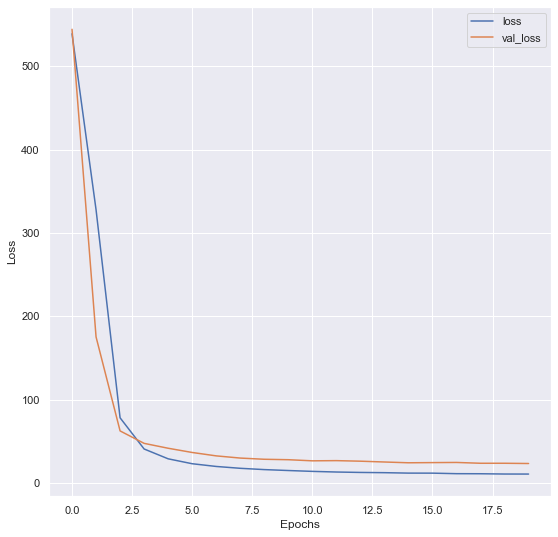

In [27]:
keras.backend.clear_session()

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[11], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(history.history.keys())
plt.show()

This model has a loss of 23. A little worse than the previous model and the curves dont seem to be as smooth.

## Hyperparameter Tuning a Model

In [109]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras import optimizers
from keras.optimizers import RMSprop


In [110]:
X_train_full, X_test, y_train_full, y_test = train_test_split(boston.data, boston.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(284, 13)
(127, 13)
(95, 13)
(284,)
(127,)
(95,)


In [111]:
K = keras.backend
K.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[13]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs = 10,
                    validation_data=(X_valid, y_valid),
                   batch_size=32)

Train on 284 samples, validate on 95 samples
Epoch 1/10
284/284 [==============================] - 0s 818us/sample - loss: 549.8899 - val_loss: 535.2233
Epoch 2/10
284/284 [==============================] - 0s 60us/sample - loss: 301.3445 - val_loss: 165.5422
Epoch 3/10
284/284 [==============================] - 0s 55us/sample - loss: 93.4312 - val_loss: 61.3568
Epoch 4/10
284/284 [==============================] - 0s 55us/sample - loss: 41.0117 - val_loss: 38.5493
Epoch 5/10
284/284 [==============================] - 0s 60us/sample - loss: 24.7043 - val_loss: 33.5325
Epoch 6/10
284/284 [==============================] - 0s 55us/sample - loss: 20.1508 - val_loss: 31.3210
Epoch 7/10
284/284 [==============================] - 0s 56us/sample - loss: 17.9415 - val_loss: 30.0090
Epoch 8/10
284/284 [==============================] - 0s 55us/sample - loss: 16.8445 - val_loss: 29.1612
Epoch 9/10
284/284 [==============================] - 0s 58us/sample - loss: 16.0005 - val_loss: 28.4398
Epoch

In [112]:
K.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[13]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [113]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 284 samples, validate on 95 samples
Epoch 1/100
284/284 [==============================] - 0s 737us/sample - loss: 372.5496 - val_loss: 205.0064
Epoch 2/100
284/284 [==============================] - 0s 56us/sample - loss: 98.6179 - val_loss: 61.0862
Epoch 3/100
284/284 [==============================] - 0s 56us/sample - loss: 38.6789 - val_loss: 41.0979
Epoch 4/100
284/284 [==============================] - 0s 55us/sample - loss: 26.0775 - val_loss: 36.1172
Epoch 5/100
284/284 [==============================] - 0s 55us/sample - loss: 22.4868 - val_loss: 33.8186
Epoch 6/100
284/284 [==============================] - 0s 55us/sample - loss: 20.7207 - val_loss: 32.3594
Epoch 7/100
284/284 [==============================] - 0s 58us/sample - loss: 19.1175 - val_loss: 30.5220
Epoch 8/100
284/284 [==============================] - 0s 63us/sample - loss: 18.1218 - val_loss: 29.8850
Epoch 9/100
284/284 [==============================] - 0s 60us/sample - loss: 17.2541 - val_loss: 28.569

In [114]:
mse_test = keras_reg.score(X_test, y_test)

127/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [115]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 189 samples, validate on 95 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


189/189 [==============================] - 0s 1ms/sample - loss: 599.7315 - val_loss: 659.3490
Epoch 2/100
189/189 [==============================] - 0s 71us/sample - loss: 571.5891 - val_loss: 628.7507
Epoch 3/100
189/189 [==============================] - 0s 74us/sample - loss: 545.3032 - val_loss: 600.4626
Epoch 4/100
189/189 [==============================] - 0s 71us/sample - loss: 520.8803 - val_loss: 573.8660
Epoch 5/100
189/189 [==============================] - 0s 71us/sample - loss: 498.2802 - val_loss: 548.9779
Epoch 6/100
189/189 [==============================] - 0s 74us/sample - loss: 476.8933 - val_loss: 525.8119
Epoch 7/100
189/189 [==============================] - 0s 74us/sample - loss: 457.2530 - val_loss: 503.8353
Epoch 8/100
189/189 [==============================] - 0s 77us/sample - loss: 437.8959 - val_loss: 483.0912
Epoch 9/100
189/189 [==============================] - 0s 74us/sample - loss: 420.5211 - val_loss: 463.4943
Epoch 10/100
189/189 [===================

Epoch 77/100
189/189 [==============================] - 0s 69us/sample - loss: 46.7810 - val_loss: 59.7773
Epoch 78/100
189/189 [==============================] - 0s 69us/sample - loss: 45.8129 - val_loss: 58.7639
Epoch 79/100
189/189 [==============================] - 0s 64us/sample - loss: 44.9266 - val_loss: 57.8022
Epoch 80/100
189/189 [==============================] - 0s 69us/sample - loss: 43.9674 - val_loss: 56.8681
Epoch 81/100
189/189 [==============================] - 0s 69us/sample - loss: 43.1185 - val_loss: 55.9812
Epoch 82/100
189/189 [==============================] - 0s 66us/sample - loss: 42.2359 - val_loss: 55.1251
Epoch 83/100
189/189 [==============================] - 0s 61us/sample - loss: 41.4309 - val_loss: 54.3106
Epoch 84/100
189/189 [==============================] - 0s 64us/sample - loss: 40.6669 - val_loss: 53.5272
Epoch 85/100
189/189 [==============================] - 0s 66us/sample - loss: 39.9040 - val_loss: 52.7676
Epoch 86/100
189/189 [===============

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


189/189 [==============================] - 0s 1ms/sample - loss: 588.5583 - val_loss: 674.5366
Epoch 2/100
189/189 [==============================] - 0s 69us/sample - loss: 558.0602 - val_loss: 643.5534
Epoch 3/100
189/189 [==============================] - 0s 66us/sample - loss: 529.2201 - val_loss: 615.0480
Epoch 4/100
189/189 [==============================] - 0s 69us/sample - loss: 503.6678 - val_loss: 588.7094
Epoch 5/100
189/189 [==============================] - 0s 64us/sample - loss: 479.6456 - val_loss: 564.2210
Epoch 6/100
189/189 [==============================] - 0s 64us/sample - loss: 457.9514 - val_loss: 541.3534
Epoch 7/100
189/189 [==============================] - 0s 69us/sample - loss: 437.6755 - val_loss: 519.8098
Epoch 8/100
189/189 [==============================] - 0s 64us/sample - loss: 418.5775 - val_loss: 499.4879
Epoch 9/100
189/189 [==============================] - 0s 64us/sample - loss: 400.6832 - val_loss: 480.3039
Epoch 10/100
189/189 [===================

190/190 [==============================] - 0s 63us/sample - loss: 238.1341 - val_loss: 288.6109
Epoch 24/100
190/190 [==============================] - 0s 68us/sample - loss: 229.5823 - val_loss: 278.7947
Epoch 25/100
190/190 [==============================] - 0s 61us/sample - loss: 221.6121 - val_loss: 269.3716
Epoch 26/100
190/190 [==============================] - 0s 66us/sample - loss: 213.4943 - val_loss: 260.3445
Epoch 27/100
190/190 [==============================] - ETA: 0s - loss: 173.651 - 0s 66us/sample - loss: 206.1200 - val_loss: 251.6740
Epoch 28/100
190/190 [==============================] - 0s 66us/sample - loss: 198.7313 - val_loss: 243.3619
Epoch 29/100
190/190 [==============================] - 0s 63us/sample - loss: 191.9231 - val_loss: 235.3529
Epoch 30/100
190/190 [==============================] - 0s 63us/sample - loss: 185.0882 - val_loss: 227.6684
Epoch 31/100
190/190 [==============================] - 0s 66us/sample - loss: 178.6427 - val_loss: 220.2816
Epoch 

Epoch 46/100
189/189 [==============================] - 0s 64us/sample - loss: 21.0579 - val_loss: 34.5761
Epoch 47/100
189/189 [==============================] - 0s 64us/sample - loss: 21.0326 - val_loss: 34.3113
Epoch 48/100
189/189 [==============================] - 0s 71us/sample - loss: 20.9350 - val_loss: 34.2506
Epoch 49/100
189/189 [==============================] - 0s 74us/sample - loss: 21.0904 - val_loss: 34.2963
Epoch 50/100
189/189 [==============================] - 0s 77us/sample - loss: 20.9726 - val_loss: 34.1036
Epoch 51/100
189/189 [==============================] - 0s 69us/sample - loss: 20.8855 - val_loss: 34.0339
Epoch 52/100
189/189 [==============================] - 0s 69us/sample - loss: 20.8660 - val_loss: 34.0584
Epoch 53/100
189/189 [==============================] - 0s 71us/sample - loss: 20.8575 - val_loss: 34.0033
Epoch 54/100
189/189 [==============================] - 0s 85us/sample - loss: 20.9299 - val_loss: 33.9695
Epoch 55/100
189/189 [===============

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   1.6s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 998us/sample - loss: 543.3083 - val_loss: 550.4263
Epoch 2/100
189/189 [==============================] - 0s 66us/sample - loss: 428.4057 - val_loss: 447.6197
Epoch 3/100
189/189 [==============================] - 0s 64us/sample - loss: 341.0751 - val_loss: 369.5836
Epoch 4/100
189/189 [==============================] - 0s 64us/sample - loss: 276.4447 - val_loss: 308.5299
Epoch 5/100
189/189 [==============================] - 0s 64us/sample - loss: 224.6573 - val_loss: 259.6121
Epoch 6/100
189/189 [==============================] - 0s 64us/sample - loss: 184.6207 - val_loss: 220.6468
Epoch 7/100
189/189 [==============================] - 0s 66us/sample - loss: 152.8152 - val_loss: 188.6785
Epoch 8/100
189/189 [========================

190/190 [==============================] - 0s 61us/sample - loss: 21.2941 - val_loss: 34.7669
Epoch 32/100
190/190 [==============================] - 0s 63us/sample - loss: 21.0277 - val_loss: 34.3960
Epoch 33/100
190/190 [==============================] - 0s 68us/sample - loss: 20.8631 - val_loss: 34.3225
Epoch 34/100
190/190 [==============================] - 0s 61us/sample - loss: 20.7759 - val_loss: 34.2733
Epoch 35/100
190/190 [==============================] - 0s 58us/sample - loss: 20.5004 - val_loss: 34.0892
Epoch 36/100
190/190 [==============================] - 0s 63us/sample - loss: 20.5135 - val_loss: 33.8802
Epoch 37/100
190/190 [==============================] - 0s 61us/sample - loss: 20.4232 - val_loss: 33.7617
Epoch 38/100
190/190 [==============================] - 0s 61us/sample - loss: 20.2693 - val_loss: 33.7606
Epoch 39/100
190/190 [==============================] - 0s 63us/sample - loss: 20.2508 - val_loss: 33.7261
Epoch 40/100
190/190 [============================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   1.3s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 1ms/sample - loss: 588.0903 - val_loss: 633.4655
Epoch 2/100
189/189 [==============================] - 0s 69us/sample - loss: 522.6755 - val_loss: 553.5704
Epoch 3/100
189/189 [==============================] - 0s 77us/sample - loss: 429.2991 - val_loss: 423.9345
Epoch 4/100
189/189 [==============================] - 0s 71us/sample - loss: 284.5714 - val_loss: 234.7404
Epoch 5/100
189/189 [==============================] - 0s 71us/sample - loss: 132.2392 - val_loss: 98.9558
Epoch 6/100
189/189 [==============================] - 0s 71us/sample - loss: 62.4294 - val_loss: 57.6307
Epoch 7/100
189/189 [==============================] - 0s 77us/sample - loss: 41.6104 - val_loss: 45.1482
Epoch 8/100
189/189 [==============================]

Epoch 76/100
189/189 [==============================] - 0s 77us/sample - loss: 8.5771 - val_loss: 22.6635
Epoch 77/100
189/189 [==============================] - 0s 87us/sample - loss: 8.5667 - val_loss: 22.8634
Epoch 78/100
189/189 [==============================] - 0s 69us/sample - loss: 8.4244 - val_loss: 22.4801
Epoch 79/100
189/189 [==============================] - 0s 71us/sample - loss: 8.3978 - val_loss: 22.6418
Epoch 80/100
189/189 [==============================] - 0s 74us/sample - loss: 8.2945 - val_loss: 22.5208
Epoch 81/100
189/189 [==============================] - 0s 77us/sample - loss: 8.1550 - val_loss: 22.4608
Epoch 82/100
189/189 [==============================] - 0s 74us/sample - loss: 8.2746 - val_loss: 22.6710
Epoch 83/100
189/189 [==============================] - 0s 69us/sample - loss: 8.1233 - val_loss: 22.8309
Epoch 84/100
189/189 [==============================] - 0s 71us/sample - loss: 8.1458 - val_loss: 22.5465
Epoch 85/100
189/189 [========================

Epoch 24/100
189/189 [==============================] - 0s 74us/sample - loss: 13.5938 - val_loss: 34.2085
Epoch 25/100
189/189 [==============================] - 0s 71us/sample - loss: 13.2618 - val_loss: 33.9223
Epoch 26/100
189/189 [==============================] - 0s 74us/sample - loss: 13.2036 - val_loss: 33.7514
Epoch 27/100
189/189 [==============================] - 0s 71us/sample - loss: 12.9053 - val_loss: 33.5006
Epoch 28/100
189/189 [==============================] - 0s 71us/sample - loss: 12.6858 - val_loss: 33.2483
Epoch 29/100
189/189 [==============================] - 0s 66us/sample - loss: 12.4701 - val_loss: 33.2673
Epoch 30/100
189/189 [==============================] - 0s 71us/sample - loss: 12.2509 - val_loss: 32.9018
Epoch 31/100
189/189 [==============================] - 0s 71us/sample - loss: 12.0037 - val_loss: 32.7591
Epoch 32/100
189/189 [==============================] - 0s 71us/sample - loss: 12.0226 - val_loss: 32.9062
Epoch 33/100
189/189 [===============

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total=   1.8s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 190 samples, validate on 95 samples
Epoch 1/100
190/190 [==============================] - 0s 1ms/sample - loss: 580.5098 - val_loss: 643.1225
Epoch 2/100
190/190 [==============================] - 0s 79us/sample - loss: 527.0219 - val_loss: 581.7810
Epoch 3/100
190/190 [==============================] - 0s 71us/sample - loss: 453.3187 - val_loss: 480.8459
Epoch 4/100
190/190 [==============================] - 0s 66us/sample - loss: 331.1147 - val_loss: 317.5769
Epoch 5/100
190/190 [==============================] - 0s 76us/sample - loss: 178.7290 - val_loss: 165.8378
Epoch 6/100
190/190 [==============================] - 0s 68us/sample - loss: 91.4353 - val_loss: 96.4089
Epoch 7/100
190/190 [==============================] - 0s 71us/sample - loss: 60.3625 - val_loss: 73.9146
Epoch 8/100
190/190 [=============================

190/190 [==============================] - 0s 71us/sample - loss: 7.4567 - val_loss: 28.9897
Epoch 77/100
190/190 [==============================] - 0s 74us/sample - loss: 7.3745 - val_loss: 29.0207
Epoch 78/100
190/190 [==============================] - 0s 74us/sample - loss: 7.3415 - val_loss: 28.9347
Epoch 79/100
190/190 [==============================] - 0s 71us/sample - loss: 7.2949 - val_loss: 29.0488
Epoch 80/100
190/190 [==============================] - 0s 68us/sample - loss: 7.3498 - val_loss: 29.0526
Epoch 81/100
190/190 [==============================] - 0s 68us/sample - loss: 7.2707 - val_loss: 29.0025
Epoch 82/100
190/190 [==============================] - 0s 76us/sample - loss: 7.2788 - val_loss: 28.8234
Epoch 83/100
190/190 [==============================] - 0s 68us/sample - loss: 7.1684 - val_loss: 28.9411
Epoch 84/100
190/190 [==============================] - 0s 76us/sample - loss: 7.2301 - val_loss: 28.8088
Epoch 85/100
190/190 [==============================] - 0s 

95/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

190/190 [==============================] - 0s 76us/sample - loss: 360.6652 - val_loss: 350.9502
Epoch 6/100
190/190 [==============================] - 0s 71us/sample - loss: 189.9456 - val_loss: 149.1676
Epoch 7/100
190/190 [==============================] - 0s 71us/sample - loss: 85.0636 - val_loss: 87.4604
Epoch 8/100
190/190 [==============================] - 0s 76us/sample - loss: 58.7448 - val_loss: 58.1864
Epoch 9/100
190/190 [==============================] - 0s 71us/sample - loss: 45.8084 - val_loss: 50.3124
Epoch 10/100
190/190 [==============================] - 0s 74us/sample - loss: 38.1008 - val_loss: 43.9893
Epoch 11/100
190/190 [==============================] - 0s 74us/sample - loss: 33.5799 - val_loss: 41.0526
Epoch 12/100
190/190 [==============================] - 0s 74us/sample - loss: 30.4376 - val_loss: 38.6831
Epoch 13/100
190/190 [==============================] - 0s 71us/sample - loss: 28.0558 - val_loss: 36.8312
Epoch 14/100
190/190 [============================

Epoch 82/100
190/190 [==============================] - 0s 74us/sample - loss: 7.9942 - val_loss: 25.0485
Epoch 83/100
190/190 [==============================] - ETA: 0s - loss: 8.839 - 0s 71us/sample - loss: 7.8529 - val_loss: 25.2860
Epoch 84/100
190/190 [==============================] - 0s 66us/sample - loss: 7.8206 - val_loss: 25.1826
Epoch 85/100
190/190 [==============================] - 0s 71us/sample - loss: 7.7271 - val_loss: 24.9411
Epoch 86/100
190/190 [==============================] - 0s 63us/sample - loss: 7.6663 - val_loss: 25.0319
Epoch 87/100
190/190 [==============================] - 0s 66us/sample - loss: 7.6930 - val_loss: 25.0876
Epoch 88/100
190/190 [==============================] - 0s 66us/sample - loss: 7.6944 - val_loss: 25.3475
Epoch 89/100
190/190 [==============================] - 0s 71us/sample - loss: 7.5902 - val_loss: 25.2064
Epoch 90/100
190/190 [==============================] - 0s 76us/sample - loss: 7.5815 - val_loss: 25.1365
Epoch 91/100
190/190 [

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   1.6s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 980us/sample - loss: 544.3391 - val_loss: 570.5563
Epoch 2/100
189/189 [==============================] - 0s 64us/sample - loss: 461.1909 - val_loss: 492.7627
Epoch 3/100
189/189 [==============================] - 0s 64us/sample - loss: 393.0468 - val_loss: 429.5892
Epoch 4/100
189/189 [==============================] - 0s 66us/sample - loss: 339.1491 - val_loss: 376.9736
Epoch 5/100
189/189 [==============================] - 0s 64us/sample - loss: 293.0520 - val_loss: 332.2191
Epoch 6/100
189/189 [==============================] - 0s 69us/sample - loss: 254.8309 - val_loss: 294.1572
Epoch 7/100
189/189 [==============================] - 0s 69us/sample - loss: 222.3440 - val_loss: 261.1958
Epoch 8/100
189/189 [=========================

190/190 [==============================] - 0s 66us/sample - loss: 45.4106 - val_loss: 60.5245
Epoch 23/100
190/190 [==============================] - 0s 63us/sample - loss: 41.8574 - val_loss: 56.8231
Epoch 24/100
190/190 [==============================] - 0s 61us/sample - loss: 38.9849 - val_loss: 53.6618
Epoch 25/100
190/190 [==============================] - 0s 63us/sample - loss: 36.5705 - val_loss: 50.8205
Epoch 26/100
190/190 [==============================] - 0s 68us/sample - loss: 34.2910 - val_loss: 48.4745
Epoch 27/100
190/190 [==============================] - 0s 66us/sample - loss: 32.5391 - val_loss: 46.4357
Epoch 28/100
190/190 [==============================] - 0s 71us/sample - loss: 30.8076 - val_loss: 44.6884
Epoch 29/100
190/190 [==============================] - 0s 68us/sample - loss: 29.3326 - val_loss: 43.1141
Epoch 30/100
190/190 [==============================] - 0s 68us/sample - loss: 28.1256 - val_loss: 41.7825
Epoch 31/100
190/190 [============================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   1.3s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 1ms/sample - loss: 337.6624 - val_loss: 53.7301
Epoch 2/100
189/189 [==============================] - 0s 71us/sample - loss: 37.6386 - val_loss: 39.1686
Epoch 3/100
189/189 [==============================] - 0s 69us/sample - loss: 27.1270 - val_loss: 35.0776
Epoch 4/100
189/189 [==============================] - 0s 66us/sample - loss: 22.4747 - val_loss: 32.7135
Epoch 5/100
189/189 [==============================] - 0s 74us/sample - loss: 20.5317 - val_loss: 28.8418
Epoch 6/100
189/189 [==============================] - 0s 77us/sample - loss: 18.9226 - val_loss: 31.9401
Epoch 7/100
189/189 [==============================] - 0s 71us/sample - loss: 16.4644 - val_loss: 28.9114
Epoch 8/100
189/189 [==============================] - 0s 69u

190/190 [==============================] - 0s 68us/sample - loss: 11.2710 - val_loss: 24.7039
Epoch 10/100
190/190 [==============================] - 0s 66us/sample - loss: 10.2903 - val_loss: 24.1896
Epoch 11/100
190/190 [==============================] - 0s 68us/sample - loss: 9.5038 - val_loss: 27.9603
Epoch 12/100
190/190 [==============================] - 0s 68us/sample - loss: 9.7684 - val_loss: 25.3296
Epoch 13/100
190/190 [==============================] - 0s 66us/sample - loss: 9.5386 - val_loss: 24.5789
Epoch 14/100
190/190 [==============================] - 0s 68us/sample - loss: 10.3499 - val_loss: 25.9786
Epoch 15/100
190/190 [==============================] - 0s 63us/sample - loss: 8.5732 - val_loss: 25.2794
Epoch 16/100
190/190 [==============================] - 0s 63us/sample - loss: 9.4521 - val_loss: 23.3976
Epoch 17/100
190/190 [==============================] - 0s 66us/sample - loss: 8.0647 - val_loss: 23.4488
Epoch 18/100
190/190 [==============================] - 

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=   1.9s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 2ms/sample - loss: 578.2227 - val_loss: 663.5705
Epoch 2/100
189/189 [==============================] - 0s 77us/sample - loss: 559.1734 - val_loss: 641.9346
Epoch 3/100
189/189 [==============================] - 0s 79us/sample - loss: 535.9184 - val_loss: 612.3085
Epoch 4/100
189/189 [==============================] - 0s 77us/sample - loss: 502.3404 - val_loss: 566.2325
Epoch 5/100
189/189 [==============================] - 0s 74us/sample - loss: 447.8775 - val_loss: 487.9458
Epoch 6/100
189/189 [==============================] - 0s 74us/sample - loss: 354.8386 - val_loss: 354.4143
Epoch 7/100
189/189 [==============================] - 0s 74us/sample - loss: 219.6080 - val_loss: 194.6762
Epoch 8/100
189/189 [========================

Epoch 23/100
190/190 [==============================] - 0s 79us/sample - loss: 15.4656 - val_loss: 37.1236
Epoch 24/100
190/190 [==============================] - 0s 71us/sample - loss: 15.0457 - val_loss: 36.9340
Epoch 25/100
190/190 [==============================] - 0s 71us/sample - loss: 14.4968 - val_loss: 36.9826
Epoch 26/100
190/190 [==============================] - 0s 68us/sample - loss: 14.1610 - val_loss: 36.6335
Epoch 27/100
190/190 [==============================] - 0s 66us/sample - loss: 13.6911 - val_loss: 36.5068
Epoch 28/100
190/190 [==============================] - 0s 61us/sample - loss: 13.3644 - val_loss: 36.3265
Epoch 29/100
190/190 [==============================] - 0s 66us/sample - loss: 13.0317 - val_loss: 36.0948
Epoch 30/100
190/190 [==============================] - 0s 63us/sample - loss: 12.7873 - val_loss: 35.9075
Epoch 31/100
190/190 [==============================] - 0s 68us/sample - loss: 12.4075 - val_loss: 35.7600
Epoch 32/100
190/190 [===============

190/190 [==============================] - 0s 68us/sample - loss: 7.6850 - val_loss: 31.6012
94/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

189/189 [==============================] - 0s 64us/sample - loss: 8.6142 - val_loss: 20.8243
Epoch 49/100
189/189 [==============================] - 0s 64us/sample - loss: 8.3609 - val_loss: 21.6547
Epoch 50/100
189/189 [==============================] - 0s 64us/sample - loss: 8.2613 - val_loss: 20.0554
Epoch 51/100
189/189 [==============================] - 0s 64us/sample - loss: 7.8985 - val_loss: 21.4431
Epoch 52/100
189/189 [==============================] - 0s 64us/sample - loss: 8.1838 - val_loss: 21.7053
Epoch 53/100
189/189 [==============================] - 0s 61us/sample - loss: 7.9361 - val_loss: 21.1456
Epoch 54/100
189/189 [==============================] - 0s 66us/sample - loss: 7.9066 - val_loss: 20.3910
95/1 [=========================================================================================================================================================================================================================================================================

189/189 [==============================] - 0s 64us/sample - loss: 8.4315 - val_loss: 29.5283
Epoch 43/100
189/189 [==============================] - 0s 64us/sample - loss: 8.3948 - val_loss: 28.8152
Epoch 44/100
189/189 [==============================] - 0s 61us/sample - loss: 8.4242 - val_loss: 28.2710
Epoch 45/100
189/189 [==============================] - 0s 69us/sample - loss: 8.3569 - val_loss: 29.5252
Epoch 46/100
189/189 [==============================] - 0s 69us/sample - loss: 8.2000 - val_loss: 29.2427
Epoch 47/100
189/189 [==============================] - 0s 66us/sample - loss: 8.2070 - val_loss: 28.9089
Epoch 48/100
189/189 [==============================] - 0s 66us/sample - loss: 8.3775 - val_loss: 28.4305
Epoch 49/100
189/189 [==============================] - 0s 64us/sample - loss: 8.7241 - val_loss: 29.4683
Epoch 50/100
189/189 [==============================] - 0s 64us/sample - loss: 8.4677 - val_loss: 27.1822
Epoch 51/100
189/189 [==============================] - 0s 

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=   1.4s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 996us/sample - loss: 609.9756 - val_loss: 686.8417
Epoch 2/100
189/189 [==============================] - 0s 69us/sample - loss: 604.2594 - val_loss: 680.4238
Epoch 3/100
189/189 [==============================] - 0s 66us/sample - loss: 598.5791 - val_loss: 674.1258
Epoch 4/100
189/189 [==============================] - 0s 64us/sample - loss: 592.9858 - val_loss: 667.8934
Epoch 5/100
189/189 [==============================] - 0s 61us/sample - loss: 587.5329 - val_loss: 661.7633
Epoch 6/100
189/189 [==============================] - 0s 61us/sample - loss: 582.1094 - val_loss: 655.7777
Epoch 7/100
189/189 [==============================] - 0s 64us/sample - loss: 576.8931 - val_loss: 649.8446
Epoch 8/100
189/189 [========================

Epoch 21/100
189/189 [==============================] - 0s 58us/sample - loss: 495.7184 - val_loss: 585.7723
Epoch 22/100
189/189 [==============================] - 0s 61us/sample - loss: 491.3342 - val_loss: 581.0402
Epoch 23/100
189/189 [==============================] - 0s 64us/sample - loss: 486.7839 - val_loss: 576.4573
Epoch 24/100
189/189 [==============================] - 0s 61us/sample - loss: 482.4757 - val_loss: 571.9272
Epoch 25/100
189/189 [==============================] - 0s 64us/sample - loss: 478.3348 - val_loss: 567.4829
Epoch 26/100
189/189 [==============================] - 0s 64us/sample - loss: 474.0976 - val_loss: 563.0696
Epoch 27/100
189/189 [==============================] - 0s 64us/sample - loss: 469.9689 - val_loss: 558.7104
Epoch 28/100
189/189 [==============================] - 0s 61us/sample - loss: 465.9198 - val_loss: 554.3894
Epoch 29/100
189/189 [==============================] - 0s 61us/sample - loss: 461.9708 - val_loss: 550.1593
Epoch 30/100
189/18

Epoch 96/100
189/189 [==============================] - 0s 71us/sample - loss: 275.8369 - val_loss: 346.8809
Epoch 97/100
189/189 [==============================] - 0s 69us/sample - loss: 273.8537 - val_loss: 344.6813
Epoch 98/100
189/189 [==============================] - 0s 71us/sample - loss: 271.9062 - val_loss: 342.5005
Epoch 99/100
189/189 [==============================] - 0s 74us/sample - loss: 269.9328 - val_loss: 340.3373
Epoch 100/100
189/189 [==============================] - 0s 79us/sample - loss: 268.0303 - val_loss: 338.2009
95/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 43/100
190/190 [==============================] - 0s 82us/sample - loss: 411.2718 - val_loss: 485.5750
Epoch 44/100
190/190 [==============================] - 0s 71us/sample - loss: 408.2009 - val_loss: 482.1726
Epoch 45/100
190/190 [==============================] - 0s 82us/sample - loss: 405.2668 - val_loss: 478.8028
Epoch 46/100
190/190 [==============================] - 0s 71us/sample - loss: 402.2563 - val_loss: 475.4642
Epoch 47/100
190/190 [==============================] - 0s 66us/sample - loss: 399.3284 - val_loss: 472.1613
Epoch 48/100
190/190 [==============================] - 0s 76us/sample - loss: 396.3917 - val_loss: 468.8785
Epoch 49/100
190/190 [==============================] - 0s 68us/sample - loss: 393.5660 - val_loss: 465.6286
Epoch 50/100
190/190 [==============================] - 0s 68us/sample - loss: 390.7484 - val_loss: 462.4065
Epoch 51/100
190/190 [==============================] - 0s 68us/sample - loss: 387.8351 - val_loss: 459.2181
Epoch 52/100
190/19

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=   2.5s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 1ms/sample - loss: 465.3385 - val_loss: 128.0935
Epoch 2/100
189/189 [==============================] - 0s 79us/sample - loss: 51.9746 - val_loss: 36.2426
Epoch 3/100
189/189 [==============================] - 0s 71us/sample - loss: 28.9627 - val_loss: 32.0097
Epoch 4/100
189/189 [==============================] - 0s 69us/sample - loss: 22.2156 - val_loss: 31.0642
Epoch 5/100
189/189 [==============================] - 0s 66us/sample - loss: 19.6903 - val_loss: 26.2067
Epoch 6/100
189/189 [==============================] - 0s 66us/sample - loss: 17.9186 - val_loss: 32.9616
Epoch 7/100
189/189 [==============================] - 0s 64us/sample - loss: 15.6762 - val_loss: 27.8733
Epoch 8/100
189/189 [==============================] - 0s 

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=   1.4s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 189 samples, validate on 95 samples
Epoch 1/100
189/189 [==============================] - 0s 1ms/sample - loss: 384.1581 - val_loss: 78.7557
Epoch 2/100
189/189 [==============================] - 0s 77us/sample - loss: 48.1255 - val_loss: 44.7742
Epoch 3/100
189/189 [==============================] - 0s 71us/sample - loss: 24.7545 - val_loss: 35.3093
Epoch 4/100
189/189 [==============================] - 0s 71us/sample - loss: 19.6231 - val_loss: 32.4322
Epoch 5/100
189/189 [==============================] - 0s 79us/sample - loss: 16.5578 - val_loss: 29.7013
Epoch 6/100
189/189 [==============================] - 0s 69us/sample - loss: 17.8502 - val_loss: 38.3708
Epoch 7/100
189/189 [==============================] - 0s 87us/sample - loss: 15.0666 - val_loss: 31.1122
Epoch 8/100
189/189 [==============================] - 0s 6

190/190 [==============================] - 0s 74us/sample - loss: 8.2195 - val_loss: 26.6707
Epoch 23/100
190/190 [==============================] - 0s 76us/sample - loss: 11.3686 - val_loss: 32.4607
Epoch 24/100
190/190 [==============================] - 0s 79us/sample - loss: 9.4387 - val_loss: 25.2997
Epoch 25/100
190/190 [==============================] - 0s 76us/sample - loss: 7.4812 - val_loss: 26.0560
Epoch 26/100
190/190 [==============================] - 0s 76us/sample - loss: 7.8877 - val_loss: 26.1444
Epoch 27/100
190/190 [==============================] - 0s 76us/sample - loss: 6.9481 - val_loss: 26.5593
Epoch 28/100
190/190 [==============================] - 0s 74us/sample - loss: 7.0005 - val_loss: 25.2990
Epoch 29/100
190/190 [==============================] - 0s 84us/sample - loss: 6.8154 - val_loss: 25.4516
Epoch 30/100
190/190 [==============================] - 0s 76us/sample - loss: 7.7740 - val_loss: 26.0826
Epoch 31/100
190/190 [==============================] - 0s

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   45.7s finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001FC60375278>, as the constructor either does not set or modifies parameter learning_rate

rnd_search_cv.best_params_

rnd_search_cv.best_score_

rnd_search_cv.score(X_test, y_test)

In [119]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [120]:
keras_reg.fit(X_train, y_train, epochs=40,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 284 samples, validate on 95 samples
Epoch 1/40
284/284 [==============================] - 0s 730us/sample - loss: 469.2471 - val_loss: 324.3409
Epoch 2/40
284/284 [==============================] - 0s 49us/sample - loss: 147.5436 - val_loss: 82.3742
Epoch 3/40
284/284 [==============================] - 0s 58us/sample - loss: 52.5887 - val_loss: 52.6224
Epoch 4/40
284/284 [==============================] - 0s 55us/sample - loss: 32.4876 - val_loss: 45.6982
Epoch 5/40
284/284 [==============================] - 0s 55us/sample - loss: 26.2055 - val_loss: 42.5496
Epoch 6/40
284/284 [==============================] - 0s 53us/sample - loss: 23.4092 - val_loss: 40.2983
Epoch 7/40
284/284 [==============================] - 0s 53us/sample - loss: 21.2871 - val_loss: 37.3436
Epoch 8/40
284/284 [==============================] - 0s 55us/sample - loss: 19.7130 - val_loss: 35.7361
Epoch 9/40
284/284 [==============================] - 0s 53us/sample - loss: 18.4905 - val_loss: 34.0670
Epoch 

Train on 284 samples, validate on 95 samples
Epoch 1/100
284/284 [==============================] - 0s 825us/sample - loss: 554.3928 - val_loss: 570.6184
Epoch 2/100
284/284 [==============================] - 0s 62us/sample - loss: 367.6479 - val_loss: 235.0022
Epoch 3/100
284/284 [==============================] - 0s 62us/sample - loss: 102.0714 - val_loss: 63.2713
Epoch 4/100
284/284 [==============================] - 0s 63us/sample - loss: 38.0566 - val_loss: 43.2755
Epoch 5/100
284/284 [==============================] - 0s 56us/sample - loss: 25.1417 - val_loss: 38.8938
Epoch 6/100
284/284 [==============================] - 0s 60us/sample - loss: 20.8887 - val_loss: 35.4234
Epoch 7/100
284/284 [==============================] - 0s 58us/sample - loss: 18.5667 - val_loss: 33.0787
Epoch 8/100
284/284 [==============================] - 0s 63us/sample - loss: 17.0574 - val_loss: 31.2035
Epoch 9/100
284/284 [==============================] - 0s 60us/sample - loss: 16.1426 - val_loss: 30.

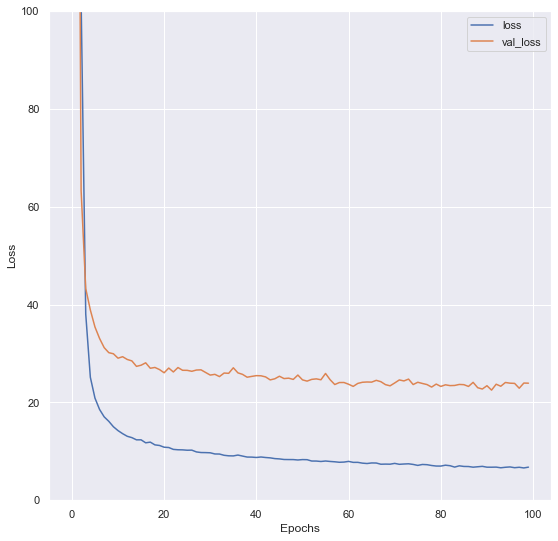

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[13]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs = 100,
                    validation_data=(X_valid, y_valid),
                   batch_size=32)

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,100)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(history.history.keys())
plt.show()